In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
test = pd.read_csv("Polynomial_test.csv")
train = pd.read_csv("Polynomial_train.csv")

train = (train - np.min(train)) / (np.max(train) - np.min(train)) 
test = (test - np.min(test)) / (np.max(test) - np.min(test))
test.head()

,Unnamed: 0,X,Y,Z,label
0,0.0000,0.966123,0.520763,0.799372,0.348891
1,0.0001,0.640607,0.807332,0.821102,0.361912
2,0.0002,0.366511,0.888973,0.153398,0.416444
3,0.0003,0.150386,0.039686,0.542708,0.146510
4,0.0004,0.578721,0.389405,0.801596,0.426142


In [ ]:
train = train.drop(["Unnamed: 0"], axis = 1)
test = test.drop(["Unnamed: 0"], axis = 1)
test.head()

,X,Y,Z,label
0,0.966123,0.520763,0.799372,0.348891
1,0.640607,0.807332,0.821102,0.361912
2,0.366511,0.888973,0.153398,0.416444
3,0.150386,0.039686,0.542708,0.146510
4,0.578721,0.389405,0.801596,0.426142


In [ ]:
#Creating matrices for training dataset
X = train.values[:, :-1]
Y = train.values[:, -1].reshape(train.values.shape[0], 1)

#Creating matrices for testing dataset
X_test = test.values[:, :-1]
Y_test = test.values[:, -1].reshape(test.values.shape[0], 1)

print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 3)
(50000, 1)
(10000, 3)
(10000, 1)


In [ ]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T
print(X)

[[1.         0.2318255  0.00620153 0.2105835 ]
 [1.         0.18804274 0.28287559 0.06501568]
 [1.         0.1287159  0.3701538  0.40948095]
 ...
 [1.         0.36192257 0.32432986 0.47638034]
 [1.         0.29530506 0.65766616 0.26104849]
 [1.         0.23138369 0.8550764  0.3404406 ]]


In [ ]:
class PolynomialRegression:
  def visualize(X, y):
      fig = plt.figure(figsize=(12,12))
      plt.plot(X,y,'ro',ms=10,mec='k')

  def hypothesis(theta, x):
        return np.dot(X, theta) + np.dot(X**2, theta)

  def train(X, Y, learning_rate, no_of_iterations):
      m_train = Y.size
      theta = np.zeros((X.shape[1], 1))
      cost_list = []
      
      for i in range(no_of_iterations):
          y_pred = np.dot(X, theta) + np.dot(X**2, theta)
          cost = (1/(2*m_train))*np.sum(np.square(y_pred - Y))
          
          grad = (1/m_train)*np.dot(X.T, y_pred - Y)
          theta -=learning_rate*grad
          
          cost_list.append(cost)
          
          if(i%(no_of_iterations/10) == 0):
              print('Cost per 100 iterations is :', cost)

      return theta, cost_list

  def predict(X, theta):
      return PolynomialRegression.hypothesis(theta, X)
  
  def costPlot(cost, iters):
    plt.plot(np.arange(iters), cost, '-b', LineWidth=2)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.show()
  
  def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    r2 = 1 - (rss / tss)
    return r2

  def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
iteration = 1000
lr = 0.05
theta, cost_list = PolynomialRegression.train(X, Y, learning_rate =lr ,no_of_iterations = iteration)

Cost per 100 iterations is : 0.10094464481451891
Cost per 100 iterations is : 0.00988271501477823
Cost per 100 iterations is : 0.009515473146114017
Cost per 100 iterations is : 0.009389814591320681
Cost per 100 iterations is : 0.009344622016244962
Cost per 100 iterations is : 0.00932714850124968
Cost per 100 iterations is : 0.009319626242602016
Cost per 100 iterations is : 0.009315900827779075
Cost per 100 iterations is : 0.009313765104040014
Cost per 100 iterations is : 0.009312385296018777


In [ ]:
y_pred = np.dot(X_test, theta) + np.dot(X_test**2,theta)

rmse = np.sqrt(((y_pred-Y_test)**2).mean())
print(rmse)

0.14087054496348925


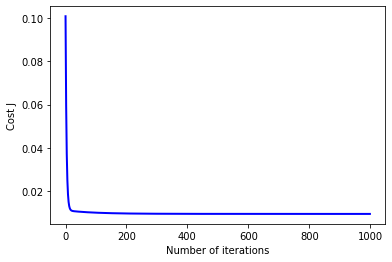

In [ ]:
PolynomialRegression.costPlot(cost_list,iteration)